<a href="https://colab.research.google.com/github/dhanyab123/convolutetheworld/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Dog VS Cat

To build a convolution neural network which distinguishes between cats and dogs with minimum accuracy of 60% on test data and run time of training below 6 minutes.

---

In [ ]:
# Install the kaggle library
!pip install -q kaggle 

# To upload the kaggle.json file
from google.colab import files
files.upload()

# Create kaggle folder
!mkdir ~/.kaggle

# Copy kaggle.json into folder kaggle
!cp kaggle.json ~/.kaggle

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json  

In [ ]:
# To download the required dataset from kaggle
!kaggle datasets download -d biaiscience/dogs-vs-cats 

In [ ]:
# Unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
import os

In [ ]:
# Assigning path for test and train data
TRAIN_DATA_PATH = '/content/train/train'
TEST_DATA_PATH = '/content/test/test'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data pre-processing

In [ ]:
imgs_per_cat = 3000
img_size = 200
labels = []
train_image = []
cat = 0
dog = 0
for item in os.listdir(TRAIN_DATA_PATH):
    if item.split('.')[0] == 'cat':
        if cat >= imgs_per_cat:
            continue
        cat += 1
        labels.append(0)
    elif item.split('.')[0] == 'dog':
        if dog >= imgs_per_cat:
            continue
        dog += 1
        labels.append(1)
    img = image.load_img(TRAIN_DATA_PATH + '/' + str(item), target_size=(img_size, img_size))
    img = image.img_to_array(img)
    img = img/255.0
    train_image.append(img)

# Changing list of labels into np array
label = np.array(labels)

In [ ]:
X = np.array(train_image)

In [ ]:
# Checking the shape of the training image data
X[0].shape

(200, 200, 3)

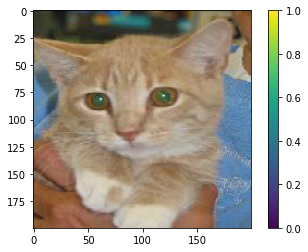

0


In [ ]:
# Viewing the train data and its resp. label
plt.imshow(X[90])
plt.colorbar()
plt.show()

print(label[90])

In [ ]:
# Checking the total number of possible labels
np.unique(label)

array([0, 1])

In [ ]:
# Splitting data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

Creating the Convolution Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu', input_shape = (200,200,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
# Adding to Loss function
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train, y_train, batch_size=60, epochs=2)

Epoch 1/2
75/75 [==============================] - 136s 2s/step - loss: 0.6830 - accuracy: 0.5427
Epoch 2/2
75/75 [==============================] - 134s 2s/step - loss: 0.6412 - accuracy: 0.6222


In [ ]:
# Testing the model
model.evaluate(X_test, y_test)

47/47 [==============================] - 12s 260ms/step - loss: 0.6407 - accuracy: 0.6227


[0.6407089829444885, 0.6226666569709778]

In [ ]:
# Checking size of testing dataset
len(y_test)

1500

Viewing output results

In [ ]:
distin = ['cat', 'dog']

# Predicting output for the test data
predictions = model.predict(X_test)

cat


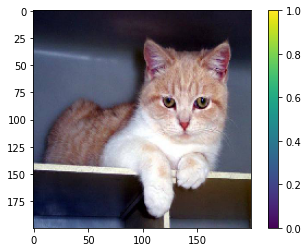

In [ ]:
# To get the prediction for the data and the input
num = 755

print(distin[np.argmax(predictions[num])])

plt.imshow(X_test[num])
plt.colorbar()
plt.show()

dog


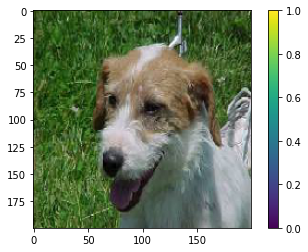

In [ ]:
num = 243

print(distin[np.argmax(predictions[num])])

plt.imshow(X_test[num])
plt.colorbar()
plt.show()